### import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### load dataset

In [2]:
df = pd.read_csv("data/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


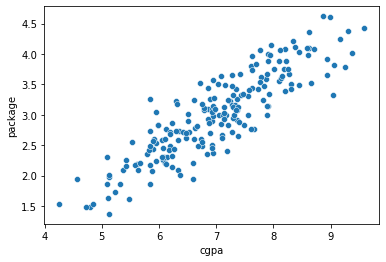

In [3]:
sns.scatterplot(x = "cgpa", y="package", data=df)
plt.show()

### split data into train test set


In [4]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((160,), (40,))

### Using sk learn LinearRegression model

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = lr.predict(X_test.reshape(-1,1))

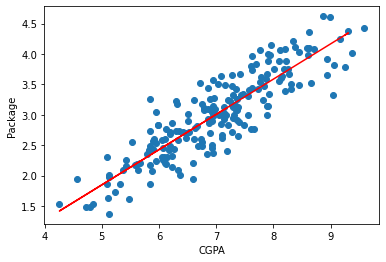

In [7]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train.reshape(-1,1)), color='red')

plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [8]:
print(f"m: {lr.coef_[0][0]}, b: {lr.intercept_[0]}")

m: 0.5796574434417333, b: -1.0512253880484304


### Coding from scratch

$\hat{Y_{i}} = m*X_{i} + b
\newline where,
m = \frac{\sum \limits _{i=1} ^{n} (y_{i} - \bar{y})(x_{i} - \bar{x})}{\sum \limits _{i=1} ^{n}(x_{i} - \bar{x})^2}
\newline b = \bar{y} - m*\bar{x}$

In [12]:
class simple_lr:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((y_train[i] - y_train.mean())*(X_train[i]-X_train.mean()))
            den = den + ((X_train[i]-X_train.mean())**2)
        
        self.m = num/den
        self.b = (y_train.mean()) - (self.m*X_train.mean())
        print(f"m: {self.m}, b: {self.b}")
        
    def predict(self, X_test):
        return self.m*X_test + self.b

In [13]:
slr = simple_lr()

slr.fit(X_train, y_train)

m: 0.5796574434417331, b: -1.0512253880484295


In [14]:
slr.predict(X_test)

array([4.12511558, 2.71654799, 2.80929319, 2.39193983, 3.73094852,
       3.19766367, 3.09332533, 3.51067869, 2.9194281 , 3.99759094,
       1.9224173 , 3.23244312, 3.20925682, 2.64119253, 2.97159727,
       2.09051796, 1.59780913, 2.41512612, 3.6903725 , 3.28461229,
       3.55125471, 2.52526104, 3.08173218, 3.76572797, 3.70196565,
       2.4209227 , 3.66138963, 2.69915827, 4.38596143, 3.64979648,
       2.78031031, 4.50189292, 3.05854589, 2.15428027, 3.9628115 ,
       1.76011321, 2.49627817, 4.09033614, 3.1918671 , 3.11651163])

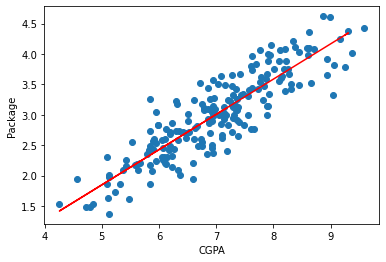

In [19]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, slr.predict(X_train.reshape(-1,1)), color='red')

plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()